In [2]:
import numpy as np  
import pandas as pd  
import statsmodels.api as sm 
from scipy.stats.mstats import winsorize
import re
from datetime import datetime
import math

## 处理数据

In [ ]:
import pandas as pd
df=pd.read_csv("Crawled_Dataset\直播间营收数据.csv",encoding="UTF-8")
income_data=df[df['count'] != 0]
income_data.head()

,Unnamed: 0,mid,date,count,currency
2,2,178464220,2022-12-03T00:00:00Z,1,1.0
3,3,178464220,2022-11-22T00:00:00Z,1,1.0
4,4,178464220,2022-11-20T00:00:00Z,1,0.5
8,8,484322035,2023-01-19T00:00:00Z,9,417.7
9,9,484322035,2023-01-18T00:00:00Z,4,139.2


In [ ]:
year_liver_data=pd.read_csv("Crawled_Dataset\虚拟主播1年数据.csv",encoding="UTF-8")
year_liver_data.head()

,Unnamed: 0,mid,name,sex,level,sign,official,birthday,roomid,fans,guards,status,archiveView,liveCount,maxPopularity,participant,danmaku,income,goldUser,danmutop20
0,0,392101937,-水梨若official-,2,3,准备好了\n\n西南交大米若可动漫社看板娘水梨若\n\nhttps://peing.net/...,0,9月26日,21745906,299,0,1,5379,0,0,0,0,0,0,{}
1,1,178464220,-籽三-,0,6,音乐制作的兔子籽三｜可以叫我三三,0,3月29日,21586495,32705,0,1,5394523,0,0,0,0,0,0,{}
2,2,15656417,贰三3三,2,6,？？？？？,0,5月10日,2802408,804,0,1,32118,0,0,0,0,0,0,{}
3,3,145913,3000biubiubiu,2,5,3000回biu星了,1,10月16日,21574518,6374,0,1,314433,0,0,0,0,0,0,{}
4,4,14712304,直立行走不存在,2,6,音無六音：http://qq2q.biz/LRdu,0,2月8日,46439,48412,0,1,4910389,0,0,0,0,0,0,{}


In [ ]:
popu_data=year_liver_data[year_liver_data['maxPopularity'] != 0]
live_data=popu_data[['mid','name','guards','archiveView','liveCount','maxPopularity','participant','danmaku','income']]
live_data

,mid,name,guards,archiveView,liveCount,maxPopularity,participant,danmaku,income
8,484322035,AIChannel中国绊爱,344,58801513,31,4168033,83713,453546,158215100
22,32906095,Alec艾里,33,3103799,7,36536,312,2154,667300
72,1480838,EricaZehnt_埃莉卡,36,540647,15,727059,2802,23558,20984400
85,508963009,HiiroVTuber,247,48699123,37,14390421,230445,705460,202390900
101,1442771,Kirikosama,91,917083,103,1626146,13773,52795,33979100
...,...,...,...,...,...,...,...,...,...
11926,3461570239662260,小鸟游千岁,98,160806,15,780775,1442,11741,10492200
11928,29243543,哈尔Hauru,36,33360,2,24951,421,3462,945800
11934,670725269,夜羽玲夕是只许愿狐,151,837603,2,220270,842,4805,9143400
11935,518490855,清兰sanrel,39,2510742,2,33619,516,3731,530000


In [ ]:
liver_fan_data=pd.read_csv("Crawled_Dataset\虚拟主播粉丝数据.csv",encoding="UTF-8")
liver_fan_data.head()

,Unnamed: 0,mid,fans,created_at,rate1,rate7
0,0,178464220,10204.0,2019-02-12T08:35:30.695Z,NaN,NaN
1,1,178464220,10292.0,2019-02-13T08:35:12.691Z,NaN,NaN
2,2,178464220,10384.0,2019-02-14T08:33:42.528Z,NaN,NaN
3,3,178464220,10470.0,2019-02-15T08:30:05.038Z,NaN,NaN
4,4,178464220,10582.0,2019-02-16T08:28:03.021Z,NaN,NaN


In [ ]:
liver_video_data=pd.read_csv("Crawled_Dataset\虚拟主播视频数据.csv",encoding="gb18030")
liver_video_data.head()

,Unnamed: 0,mid,aid,created,typeid,comment,play,video_review,length,is_union_video,meta
0,0,178464220,219768514,2022/11/5 13:43,182,350,9853,111,5:27,0,NaN
1,1,178464220,250334278,2021/9/6 18:00,28,781,150835,338,4:50,1,NaN
2,2,178464220,929239819,2021/2/12 14:00,28,1378,511798,1854,3:54,1,NaN
3,3,178464220,713021800,2020/12/4 19:03,130,41,4561,3,3:17,0,NaN
4,4,178464220,627881028,2020/11/26 11:30,31,71,8894,7,3:47,0,NaN


In [ ]:
big_fan_data=pd.read_csv("Crawled_Dataset\虚拟主播大粉数据.csv",encoding="UTF-8")
big_fan_data.head()

,Unnamed: 0,mid,bigfan_num,bigfan_total
0,0,178464220,20,1106057
1,1,484322035,20,29461166
2,2,510100897,20,5016304
3,3,446536,20,1609297
4,4,32906095,20,4890315


In [ ]:
import pandas as pd
#个人特质吸引力数据处理
year_liver_data=pd.read_csv("Crawled_Dataset\虚拟主播1年数据.csv",encoding="UTF-8")
videonum_data=pd.read_csv("Crawled_Dataset\videonum.csv",encoding="UTF-8")
year_liver_data=year_liver_data[['mid','sex','level','official','fans','liveCount']]
year_liver_data=year_liver_data[year_liver_data['liveCount']!=0]
liver_data=pd.merge(year_liver_data,videonum_data,on = ['mid'],how='left')
liver_data['video_num']=liver_data['video_num'].fillna(0)
liver_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 879 entries, 0 to 878
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mid        879 non-null    int64  
 1   sex        879 non-null    int64  
 2   level      879 non-null    int64  
 3   official   879 non-null    int64  
 4   fans       879 non-null    int64  
 5   liveCount  879 non-null    int64  
 6   video_num  879 non-null    float64
dtypes: float64(1), int64(6)
memory usage: 54.9 KB


In [ ]:
import math
liver_data['attracitve']=''
attractive=[]
for index, row in liver_data.iterrows():
    attractive.append(float(0.127*row['level']+0.17*row['sex']+0.151*math.log(row['fans'])+0.123*row['official']+0.217*row['liveCount']+0.213*row['video_num']))
liver_data['attracitve']=attractive
liver_data.head()

,mid,sex,level,official,fans,liveCount,video_num,attracitve
0,484322035,2,6,1,1047366,31,380.0,90.985130
1,32906095,2,6,0,84111,7,59.0,16.900324
2,1480838,2,6,0,46510,15,26.0,11.517861
3,508963009,2,6,1,1118283,37,144.0,42.029023
4,1442771,2,6,1,86717,103,120.0,50.852931


In [ ]:
print('开始存储')
liver_data.to_csv('Crawled_Dataset\liver_data.csv',mode='a',encoding='utf-8')
print('存储完毕')

开始存储
存储完毕


In [3]:
year_liver_data=pd.read_csv("虚拟主播1年数据.csv",encoding="UTF-8")
earn_data=pd.read_csv("直播间营收数据.csv",encoding="UTF-8")
fan_data=pd.read_csv("直播间营收数据.csv",encoding="UTF-8")
liver_data=pd.read_csv("liver_data.csv",encoding="UTF-8")
liver_data=liver_data[['mid','attracitve']] #attracitve
earn_data=earn_data[earn_data['count']!=0]
#earn_data.head()

In [4]:
popu_data=year_liver_data[year_liver_data['liveCount'] != 0]
live_data=popu_data[['mid','name','fans','guards','archiveView','liveCount','participant','danmaku','income','goldUser']]
live_data=pd.merge(live_data,liver_data,on = ['mid'],how='left')
#live_data=live_data[live_data['fans']<=191822 ]
live_data.head()

,mid,name,fans,guards,archiveView,liveCount,participant,danmaku,income,goldUser,attracitve
0,484322035,AIChannel中国绊爱,1047366,344,58801513,31,83713,453546,158215100,10505,90.985130
1,32906095,Alec艾里,84111,33,3103799,7,312,2154,667300,41,16.900324
2,1480838,EricaZehnt_埃莉卡,46510,36,540647,15,2802,23558,20984400,550,11.517861
3,508963009,HiiroVTuber,1118283,247,48699123,37,230445,705460,202390900,11513,42.029023
4,1442771,Kirikosama,86717,91,917083,103,13773,52795,33979100,1029,50.852931


In [5]:
fan_dis = pd.cut(live_data['fans'],9,right=False)  #将x中的数值分成等宽的n份
fan_distribution = pd.DataFrame(fan_dis.value_counts())
fan_distribution=fan_distribution.rename(columns={'fans':'频数'})
fan_distribution['频率'] = fan_distribution['频数']/len(live_data)
fan_distribution['累计频率'] = fan_distribution['频率'].cumsum()
fan_distribution['频率%'] = fan_distribution['频率'].apply(lambda x:"%.2f%%" %(x*100))
fan_distribution['累计频率%'] = fan_distribution['累计频率'].apply(lambda x:"%.2f%%" %(x*100))
fan_distribution.style.bar(subset=['频率','累计频率'],color='lightsteelblue')

,频数,频率,累计频率,频率%,累计频率%
"[19320.0, 402658.889)",797,0.898534,0.898534,89.85%,89.85%
"[402658.889, 785997.778)",47,0.052988,0.951522,5.30%,95.15%
"[785997.778, 1169336.667)",17,0.019166,0.970688,1.92%,97.07%
"[3086031.111, 3472820.05)",10,0.011274,0.981962,1.13%,98.20%
"[1169336.667, 1552675.556)",9,0.010147,0.992108,1.01%,99.21%
"[1552675.556, 1936014.444)",4,0.004510,0.996618,0.45%,99.66%
"[1936014.444, 2319353.333)",2,0.002255,0.998873,0.23%,99.89%
"[2319353.333, 2702692.222)",1,0.001127,1.000000,0.11%,100.00%
"[2702692.222, 3086031.111)",0,0.000000,1.000000,0.00%,100.00%


In [6]:
#80%数据 二八定律
live_data=live_data[live_data['fans']<=402658 ] 
live_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 797 entries, 1 to 886
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mid          797 non-null    int64  
 1   name         797 non-null    object 
 2   fans         797 non-null    int64  
 3   guards       797 non-null    int64  
 4   archiveView  797 non-null    int64  
 5   liveCount    797 non-null    int64  
 6   participant  797 non-null    int64  
 7   danmaku      797 non-null    int64  
 8   income       797 non-null    int64  
 9   goldUser     797 non-null    int64  
 10  attracitve   797 non-null    float64
dtypes: float64(1), int64(9), object(1)
memory usage: 74.7+ KB


In [6]:
live_data.head()

,mid,name,fans,guards,archiveView,liveCount,participant,danmaku,income,goldUser,attracitve
1,32906095,Alec艾里,84111,33,3103799,7,312,2154,667300,41,16.900324
2,1480838,EricaZehnt_埃莉卡,46510,36,540647,15,2802,23558,20984400,550,11.517861
4,1442771,Kirikosama,86717,91,917083,103,13773,52795,33979100,1029,50.852931
5,668479385,Laine_official,98785,38,5631002,41,13855,62585,30985800,1603,51.779606
6,423902976,Minicatty,97263,106,5661359,117,43812,256594,160746600,3394,68.478261


Z:\TEMP\ipykernel_5536\861703989.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(live_data.corr(), xticklabels=live_data.corr().columns, yticklabels=live_data.corr().columns, cmap='RdYlGn', center=0, annot=True)


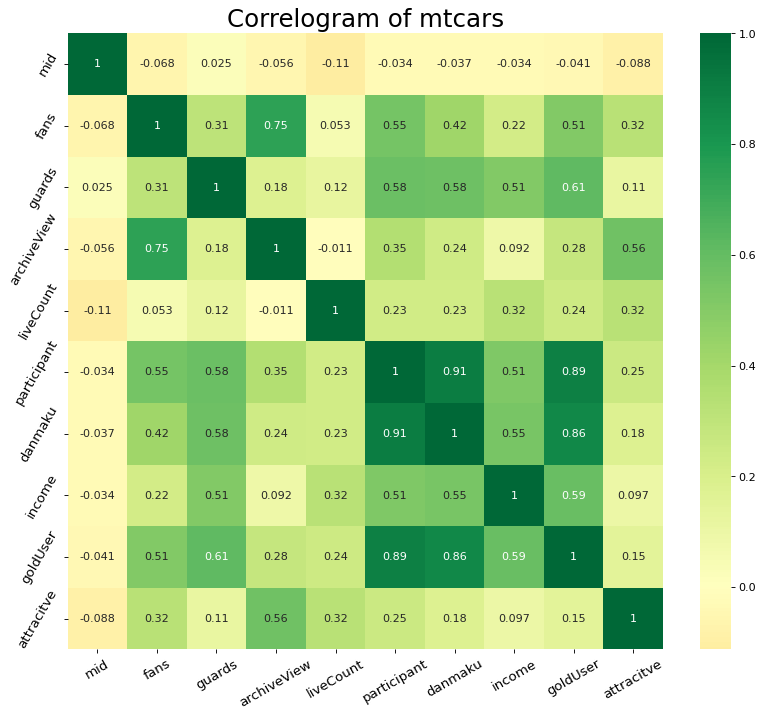

In [9]:
# Import Dataset
import seaborn as sns
import matplotlib.pyplot as plt
# Plot
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(live_data.corr(), xticklabels=live_data.corr().columns, yticklabels=live_data.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xticks (rotation=30)
plt.yticks (rotation=60)
plt.show()

## 直播

In [7]:
def looper(limit,cols,df,col):     #剔除p值不显著的
    for i in range(len(cols)):  
        data1 = df[cols]  
        x = sm.add_constant(data1) #生成自变量  
        y = df[col] #生成因变量  
        model = sm.OLS(y, x) #生成模型  
        result = model.fit() #模型拟合  
        pvalues = result.pvalues #得到结果中所有P值  
        pvalues.drop('const',inplace=True) #把const取得  
        pmax = max(pvalues) #选出最大的P值  
        if pmax>limit:  
            ind = pvalues.idxmax() #找出最大P值的index  
            cols.remove(ind) #把这个index从cols中删除  
        else:  
            return result  
#Prob (F-statistic)是我们常用的P值，其接近于零，说明我们的多元线性方程是显著的.
#通过图3中“P>|t|”这一列来判断，这一列中我们可以选定一个阈值，比如统计学常用的就是0.05、0.02或0.01，
#这里我们就用0.05，凡是P>|t|这列中数值大于0.05的自变量，我们都把它剔除掉，这些就是和y线性关系不显著的自变量，

In [34]:
live_data.head()

,mid,name,fans,guards,archiveView,liveCount,participant,danmaku,income,goldUser,attracitve
1,32906095,Alec艾里,84111,33,3103799,7,312,2154,667300,41,16.900324
2,1480838,EricaZehnt_埃莉卡,46510,36,540647,15,2802,23558,20984400,550,11.517861
4,1442771,Kirikosama,86717,91,917083,103,13773,52795,33979100,1029,50.852931
5,668479385,Laine_official,98785,38,5631002,41,13855,62585,30985800,1603,51.779606
6,423902976,Minicatty,97263,106,5661359,117,43812,256594,160746600,3394,68.478261


In [1]:
#video_if

In [35]:
cols = ['liveCount','participant','danmaku','attracitve']
guards_result = looper(0.05,cols,live_data,'guards')  
guards_result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 guards   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     161.3
Date:                Thu, 09 Mar 2023   Prob (F-statistic):           2.14e-58
Time:                        21:37:38   Log-Likelihood:                -4181.0
No. Observations:                 708   AIC:                             8368.
Df Residuals:                     705   BIC:                             8382.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.5923      5.344      7.409      0.000      29.100      50.084
danmaku        0.0003   1.77e-05     17.821      0.000       0.000       0.000
attracitve    -0.2244      0.112     -1.996      0.046      -0.445      -0.004
==============================================================================
Omnibus:                     1227.609   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1146891.317
Skew:                          10.832   Prob(JB):                         0.00
Kurtosis:                     198.980   Cond. No.                     3.72e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.72e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
cols = ['fans','guards','liveCount','participant','danmaku','goldUser','attracitve']
archiveView_result = looper(0.05,cols,live_data,'archiveView')  
archiveView_result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            archiveView   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     1695.
Date:                Tue, 07 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:46:15   Log-Likelihood:                -15621.
No. Observations:                 887   AIC:                         3.125e+04
Df Residuals:                     882   BIC:                         3.128e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         5.58e+06   2.16e+06      2.582      0.010    1.34e+06    9.82e+06
fans           62.1052      1.009     61.531      0.000      60.124      64.086
participant -1.522e+06   2.47e+05     -6.164      0.000   -2.01e+06   -1.04e+06
goldUser      115.2619     43.614      2.643      0.008      29.662     200.862
attracitve   1.735e+05   8224.458     21.092      0.000    1.57e+05     1.9e+05
==============================================================================
Omnibus:                      523.158   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            51362.446
Skew:                           1.762   Prob(JB):                         0.00
Kurtosis:                      40.112   Cond. No.                     2.89e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.89e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

archiveView=-3.077e+06+	66.5061*fans+2.793e+04*liveCount

In [54]:
#观众
cols = cols = ['fans','liveCount','attracitve']
participant_result = looper(0.05,cols,live_data,'participant')  
participant_result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            participant   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     88.09
Date:                Wed, 08 Mar 2023   Prob (F-statistic):           2.09e-48
Time:                        21:52:09   Log-Likelihood:                -8082.4
No. Observations:                 708   AIC:                         1.617e+04
Df Residuals:                     704   BIC:                         1.619e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8332.6952   1855.349     -4.491      0.000    -1.2e+04   -4690.016
fans           0.2493      0.020     12.387      0.000       0.210       0.289
liveCount     92.0403     21.187      4.344      0.000      50.443     133.638
attracitve    99.1614     31.770      3.121      0.002      36.787     161.536
==============================================================================
Omnibus:                      610.352   Durbin-Watson:                   1.824
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18823.849
Skew:                           3.745   Prob(JB):                         0.00
Kurtosis:                      27.125   Cond. No.                     1.71e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
live_data['participant']=winsorize(live_data['participant'], limits=[0,0.1])

In [11]:
cols = ['fans','archiveView','liveCount','participant','attracitve']
danmaku_result = looper(0.05,cols,live_data,'danmaku')  
danmaku_result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                danmaku   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     205.7
Date:                Tue, 07 Mar 2023   Prob (F-statistic):          3.59e-101
Time:                        16:46:16   Log-Likelihood:                -12533.
No. Observations:                 887   AIC:                         2.507e+04
Df Residuals:                     883   BIC:                         2.509e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.597e+05   6.61e+04    -14.525      0.000   -1.09e+06    -8.3e+05
fans            0.2359      0.030      7.961      0.000       0.178       0.294
liveCount    -774.0685    303.637     -2.549      0.011   -1370.002    -178.135
participant  1.275e+05   8213.461     15.529      0.000    1.11e+05    1.44e+05
==============================================================================
Omnibus:                     1184.096   Durbin-Watson:                   1.632
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           263196.670
Skew:                           6.984   Prob(JB):                         0.00
Kurtosis:                      86.225   Cond. No.                     2.87e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.87e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
cols =['guards','liveCount','participant','danmaku']
goldUser_result = looper(0.05,cols,live_data,'goldUser')  
goldUser_result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               goldUser   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     550.8
Date:                Tue, 07 Mar 2023   Prob (F-statistic):          1.07e-201
Time:                        16:46:16   Log-Likelihood:                -8994.6
No. Observations:                 887   AIC:                         1.800e+04
Df Residuals:                     883   BIC:                         1.802e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        666.1426    382.973      1.739      0.082     -85.502    1417.787
guards        -4.3875      1.497     -2.930      0.003      -7.326      -1.449
liveCount    -12.4354      4.785     -2.599      0.010     -21.827      -3.043
danmaku        0.0209      0.001     30.828      0.000       0.020       0.022
==============================================================================
Omnibus:                     1591.185   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2967244.804
Skew:                          11.632   Prob(JB):                         0.00
Kurtosis:                     285.392   Cond. No.                     8.98e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.98e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
live_data['income']=live_data['income'].map(lambda x: math.log(x))

In [15]:
#live_data['income']=live_data['income'].map(lambda x: math.log(x))
cols =['guards','liveCount','danmaku','goldUser','attracitve']
income_result = looper(0.05,cols,live_data,'income')  
income_result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 income   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     235.8
Date:                Tue, 07 Mar 2023   Prob (F-statistic):          2.35e-112
Time:                        16:46:16   Log-Likelihood:                -1547.4
No. Observations:                 887   AIC:                             3103.
Df Residuals:                     883   BIC:                             3122.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.8080      0.086    182.829      0.000      15.638      15.978
guards         0.0025      0.000      7.247      0.000       0.002       0.003
liveCount      0.0205      0.001     19.012      0.000       0.018       0.023
danmaku     8.434e-07   1.53e-07      5.507      0.000    5.43e-07    1.14e-06
==============================================================================
Omnibus:                      329.250   Durbin-Watson:                   1.823
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1762.867
Skew:                          -1.612   Prob(JB):                         0.00
Kurtosis:                       9.108   Cond. No.                     8.98e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.98e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

income=-13060000+531300*guards+518000*liveCount+896.8856*participant+59.5623*danmaku+4255.8021*goldUser

## 视频

In [6]:
video_data=pd.read_csv("虚拟主播视频数据.csv",encoding="gbk")
videonum_data=pd.read_csv("videonum.csv",encoding="utf-8")
video_data=video_data[video_data['meta'].notna()]

In [22]:
view_data=[]
danmaku_data=[]
coin_data=[]
reply_data=[]
favorite_data=[]
like_data=[]
share_data=[]
for index, row in video_data.iterrows():
    view=re.findall(r'view\': (.*), \'danmaku', row['meta'])
    view_data.append(int(view[0]))
    danmaku=re.findall(r'danmaku\': (.*), \'reply', row['meta'])
    danmaku_data.append(int(danmaku[0]))
    reply=re.findall(r'reply\': (.*), \'favorite', row['meta'])
    reply_data.append(int(reply[0]))
    favorite=re.findall(r'favorite\': (.*), \'coin', row['meta'])
    favorite_data.append(int(favorite[0]))
    coin=re.findall(r'coin\': (.*), \'share', row['meta'])
    coin_data.append(int(coin[0]))
    share=re.findall(r'share\': (.*), \'like', row['meta'])
    share_data.append(int(share[0]))
    like=re.findall(r'like\': (.*)}, \'ep_count', row['meta'])
    like_data.append(int(like[0]))

video_data['view']=view_data
video_data['danmaku']=danmaku_data
video_data['reply']=reply_data
video_data['coin']=coin_data
video_data['like']=like_data
video_data['favorite']=favorite_data
video_data['share']=share_data
#video_data.head()

In [8]:
video_data=pd.read_csv("虚拟主播视频数据.csv",encoding="gbk")
videonum_data=pd.read_csv("videonum.csv",encoding="utf-8")
video_data=video_data[video_data['meta'].notna()]
video_data['jetlag']= ''
video_data=video_data[video_data['comment']>10]
video_data=video_data[video_data['video_review']>10]
#video_data=video_data[-video_data.comment.isin(0,10)]
fan_now_data=pd.DataFrame(live_data[['mid','fans']])
video_data=pd.merge(fan_now_data,video_data,on = ['mid'],how='left')
video_data.head()

,mid,fans,Unnamed: 0,aid,created,typeid,comment,play,video_review,length,is_union_video,meta,jetlag
0,484322035,1047366,102.0,346901311.0,2022/10/27 19:16,27.0,175.0,14351.0,149.0,2:54,0.0,"{'id': 671704, 'title': '清流小AI勇闯直播圈【2022直播剪辑合集...",
1,484322035,1047366,104.0,389298894.0,2022/10/20 19:08,27.0,233.0,20250.0,379.0,4:52,0.0,"{'id': 671704, 'title': '清流小AI勇闯直播圈【2022直播剪辑合集...",
2,484322035,1047366,107.0,688781404.0,2022/10/6 17:20,27.0,241.0,22638.0,181.0,1:45,0.0,"{'id': 671704, 'title': '清流小AI勇闯直播圈【2022直播剪辑合集...",
3,484322035,1047366,131.0,898230995.0,2022/7/6 21:41,27.0,166.0,23054.0,860.0,4:02,0.0,"{'id': 671704, 'title': '清流小AI勇闯直播圈【2022直播剪辑合集...",
4,484322035,1047366,124.0,344025986.0,2022/8/3 20:50,27.0,239.0,38058.0,204.0,5:21,0.0,"{'id': 671704, 'title': '清流小AI勇闯直播圈【2022直播剪辑合集...",


In [60]:
video_data.head()

,mid,fans,aid,created,typeid,comment,play,video_review,length,is_union_video,meta,jetlag,view,danmaku,reply,coin,like,favorite,share
0,484322035,1047366,346901311.0,2022/10/27 19:16,27.0,175.0,14351.0,149.0,174,0.0,"{'id': 671704, 'title': '清流小AI勇闯直播圈【2022直播剪辑合集...",83,1378428,6682,5541,26119,174450,16957,3180
1,484322035,1047366,389298894.0,2022/10/20 19:08,27.0,233.0,20250.0,379.0,292,0.0,"{'id': 671704, 'title': '清流小AI勇闯直播圈【2022直播剪辑合集...",90,1378428,6682,5541,26119,174450,16957,3180
2,484322035,1047366,688781404.0,2022/10/6 17:20,27.0,241.0,22638.0,181.0,105,0.0,"{'id': 671704, 'title': '清流小AI勇闯直播圈【2022直播剪辑合集...",104,1378428,6682,5541,26119,174450,16957,3180
3,484322035,1047366,898230995.0,2022/7/6 21:41,27.0,166.0,23054.0,860.0,242,0.0,"{'id': 671704, 'title': '清流小AI勇闯直播圈【2022直播剪辑合集...",196,1378428,6682,5541,26119,174450,16957,3180
4,484322035,1047366,344025986.0,2022/8/3 20:50,27.0,239.0,38058.0,204.0,321,0.0,"{'id': 671704, 'title': '清流小AI勇闯直播圈【2022直播剪辑合集...",168,1378428,6682,5541,26119,174450,16957,3180


In [78]:
#metadata有无
def metadata(x):
    if x: return 1
    else: return 0
video_data['meta']=video_data['meta'].map(lambda x: metadata(x))

In [19]:

video_data['is_union_video']=video_data['is_union_video'].map(lambda x: uniondata(x))
#video_data.head(10)

In [11]:
video_data=video_data.dropna()

In [12]:
#转换视频长度
def timecount(x):
    if x.count(':') ==2:
        h, m, s = x.strip().split(':') #.split()函数将其通过':'分隔开，.strip()函数用来除去空格
        time=int(h)*3600 + int(m)*60 + int(s) #int()函数转换成整数运算
    else:
        m, s = x.strip().split(':')
        time=int(m)*60 + int(s)
    return time
video_data['length']=video_data['length'].map(lambda x: timecount(x))

video_data=video_data.drop(['Unnamed: 0'], axis=1, inplace=False)

In [13]:
#转换视频发布时间
def jetlag(x):
    date_time = datetime.strptime(x , "%Y/%m/%d %H:%M")
    d2 = datetime(2023, 1, 19)
    lag=int((d2 - date_time).days)
    if lag<0: lag=1
    return lag
video_data['jetlag']=video_data['created'].map(lambda x: jetlag(x))

In [15]:
video_data1=video_data[['mid','fans','comment','play','video_review','length','is_union_video','jetlag']]
video_data1.head()

,mid,fans,comment,play,video_review,length,is_union_video,jetlag
0,484322035,1047366,175.0,14351.0,149.0,174,0.0,83
1,484322035,1047366,233.0,20250.0,379.0,292,0.0,90
2,484322035,1047366,241.0,22638.0,181.0,105,0.0,104
3,484322035,1047366,166.0,23054.0,860.0,242,0.0,196
4,484322035,1047366,239.0,38058.0,204.0,321,0.0,168


In [65]:
cols=['length', 'jetlag','comment']
danmaku_result = looper(0.05,cols,video_data1,'video_review')  
danmaku_result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           video_review   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     2214.
Date:                Fri, 10 Mar 2023   Prob (F-statistic):               0.00
Time:                        21:37:57   Log-Likelihood:            -1.3293e+05
No. Observations:               15101   AIC:                         2.659e+05
Df Residuals:                   15097   BIC:                         2.659e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -28.3550     19.454     -1.458      0.145     -66.487       9.777
length         0.0034      0.000     22.911      0.000       0.003       0.004
jetlag         0.1410      0.041      3.409      0.001       0.060       0.222
comment        1.0598      0.014     78.311      0.000       1.033       1.086
==============================================================================
Omnibus:                    43504.657   Durbin-Watson:                   1.652
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       4512764523.171
Skew:                          38.917   Prob(JB):                         0.00
Kurtosis:                    2679.952   Cond. No.                     1.34e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
cols=['length', 'jetlag', 'fans','is_union_video']
danmaku_result = looper(0.05,cols,video_data1,'comment')  
danmaku_result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                comment   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     650.5
Date:                Fri, 10 Mar 2023   Prob (F-statistic):               0.00
Time:                        19:22:35   Log-Likelihood:            -1.2435e+05
No. Observations:               15101   AIC:                         2.487e+05
Df Residuals:                   15097   BIC:                         2.487e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             78.9026     12.117      6.512      0.000      55.153     102.653
jetlag             0.0662      0.024      2.815      0.005       0.020       0.112
fans               0.0008   1.84e-05     40.691      0.000       0.001       0.001
is_union_video   194.5107     17.221     11.295      0.000     160.756     228.266
==============================================================================
Omnibus:                    36010.284   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        624378608.276
Skew:                          24.153   Prob(JB):                         0.00
Kurtosis:                     997.983   Cond. No.                     1.20e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
video_data2=video_data[['mid','fans','reply','view','danmaku','length','coin','like','favorite','share','is_union_video','jetlag']]
video_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15101 entries, 0 to 15393
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             15101 non-null  int64  
 1   fans            15101 non-null  int64  
 2   reply           15101 non-null  int64  
 3   view            15101 non-null  int64  
 4   danmaku         15101 non-null  int64  
 5   length          15101 non-null  int64  
 6   coin            15101 non-null  int64  
 7   like            15101 non-null  int64  
 8   favorite        15101 non-null  int64  
 9   share           15101 non-null  int64  
 10  is_union_video  15101 non-null  float64
 11  jetlag          15101 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 1.5 MB


In [67]:
cols=['danmaku','reply']
danmaku_result = looper(0.05,cols,video_data2,'favorite')  
danmaku_result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               favorite   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     9619.
Date:                Fri, 10 Mar 2023   Prob (F-statistic):               0.00
Time:                        21:45:51   Log-Likelihood:            -2.0272e+05
No. Observations:               15101   AIC:                         4.055e+05
Df Residuals:                   15098   BIC:                         4.055e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.173e+04   1493.403      7.852      0.000    8799.194    1.47e+04
danmaku        1.5594      0.038     41.218      0.000       1.485       1.634
reply          4.4294      0.066     67.005      0.000       4.300       4.559
==============================================================================
Omnibus:                    18082.024   Durbin-Watson:                   0.667
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4383460.595
Skew:                           6.153   Prob(JB):                         0.00
Kurtosis:                      85.554   Cond. No.                     6.50e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.5e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
cols=['share','reply','favorite']
danmaku_result = looper(0.05,cols,video_data2,'like')  
danmaku_result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   like   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                 3.038e+04
Date:                Fri, 10 Mar 2023   Prob (F-statistic):               0.00
Time:                        21:48:50   Log-Likelihood:            -2.1507e+05
No. Observations:               15101   AIC:                         4.302e+05
Df Residuals:                   15097   BIC:                         4.302e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.521e+04   3399.642     19.183      0.000    5.86e+04    7.19e+04
share          3.7903      0.069     55.101      0.000       3.655       3.925
reply          8.3898      0.154     54.303      0.000       8.087       8.693
favorite       1.9472      0.024     79.661      0.000       1.899       1.995
==============================================================================
Omnibus:                     8389.626   Durbin-Watson:                   0.904
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1075049.920
Skew:                          -1.687   Prob(JB):                         0.00
Kurtosis:                      44.197   Cond. No.                     3.12e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.12e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
cols=['danmaku',  'reply','favorite']
danmaku_result = looper(0.05,cols,video_data2,'share')  
danmaku_result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  share   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     8677.
Date:                Fri, 10 Mar 2023   Prob (F-statistic):               0.00
Time:                        19:52:11   Log-Likelihood:            -1.8202e+05
No. Observations:               15101   AIC:                         3.640e+05
Df Residuals:                   15096   BIC:                         3.641e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4939.9123    380.596    -12.979      0.000   -5685.926   -4193.898
danmaku        0.4677      0.012     39.971      0.000       0.445       0.491
reply         -0.2336      0.019    -12.225      0.000      -0.271      -0.196
favorite       0.3185      0.004     89.431      0.000       0.312       0.325
coin          -0.1219      0.004    -30.619      0.000      -0.130      -0.114
==============================================================================
Omnibus:                    14117.434   Durbin-Watson:                   0.533
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1725054.310
Skew:                           4.120   Prob(JB):                         0.00
Kurtosis:                      54.708   Cond. No.                     4.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
cols=['danmaku', 'reply','favorite','like','share']
danmaku_result = looper(0.05,cols,video_data2,'coin')  
danmaku_result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   coin   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 3.889e+04
Date:                Fri, 10 Mar 2023   Prob (F-statistic):               0.00
Time:                        19:54:55   Log-Likelihood:            -1.8908e+05
No. Observations:               15101   AIC:                         3.782e+05
Df Residuals:                   15095   BIC:                         3.782e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        662.7144    616.648      1.075      0.283    -545.991    1871.420
danmaku        1.4569      0.017     87.435      0.000       1.424       1.490
reply          1.0695      0.034     31.883      0.000       1.004       1.135
favorite       1.0999      0.005    209.313      0.000       1.090       1.110
like          -0.1324      0.001    -90.464      0.000      -0.135      -0.130
share          0.0478      0.014      3.440      0.001       0.021       0.075
==============================================================================
Omnibus:                     5968.113   Durbin-Watson:                   0.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           341128.429
Skew:                           1.102   Prob(JB):                         0.00
Kurtosis:                      26.180   Cond. No.                     1.28e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
cols=['danmaku', 'jetlag', 'share','like','favorite']
danmaku_result = looper(0.05,cols,video_data2,'view')  
danmaku_result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   view   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                 5.457e+04
Date:                Fri, 10 Mar 2023   Prob (F-statistic):               0.00
Time:                        20:25:12   Log-Likelihood:            -2.4965e+05
No. Observations:               15101   AIC:                         4.993e+05
Df Residuals:                   15096   BIC:                         4.993e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.337e+05   3.38e+04     -9.886      0.000      -4e+05   -2.68e+05
danmaku       54.8055      0.828     66.175      0.000      53.182      56.429
share         14.6306      0.743     19.699      0.000      13.175      16.086
like           9.4603      0.074    128.219      0.000       9.316       9.605
favorite       7.8345      0.289     27.146      0.000       7.269       8.400
==============================================================================
Omnibus:                     5350.507   Durbin-Watson:                   0.693
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           409605.999
Skew:                           0.817   Prob(JB):                         0.00
Kurtosis:                      28.462   Cond. No.                     1.27e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
video_data2.head()

,mid,fans,reply,view,danmaku,length,coin,like,favorite,share,is_union_video,jetlag
0,484322035,1047366,5541,1378428,6682,174,26119,174450,16957,3180,0.0,83
1,484322035,1047366,5541,1378428,6682,292,26119,174450,16957,3180,0.0,90
2,484322035,1047366,5541,1378428,6682,105,26119,174450,16957,3180,0.0,104
3,484322035,1047366,5541,1378428,6682,242,26119,174450,16957,3180,0.0,196
4,484322035,1047366,5541,1378428,6682,321,26119,174450,16957,3180,0.0,168


Z:\TEMP\ipykernel_14796\209832643.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(video_data.corr(), xticklabels=video_data.corr().columns, yticklabels=video_data.corr().columns, cmap='RdYlGn', center=0, annot=True)


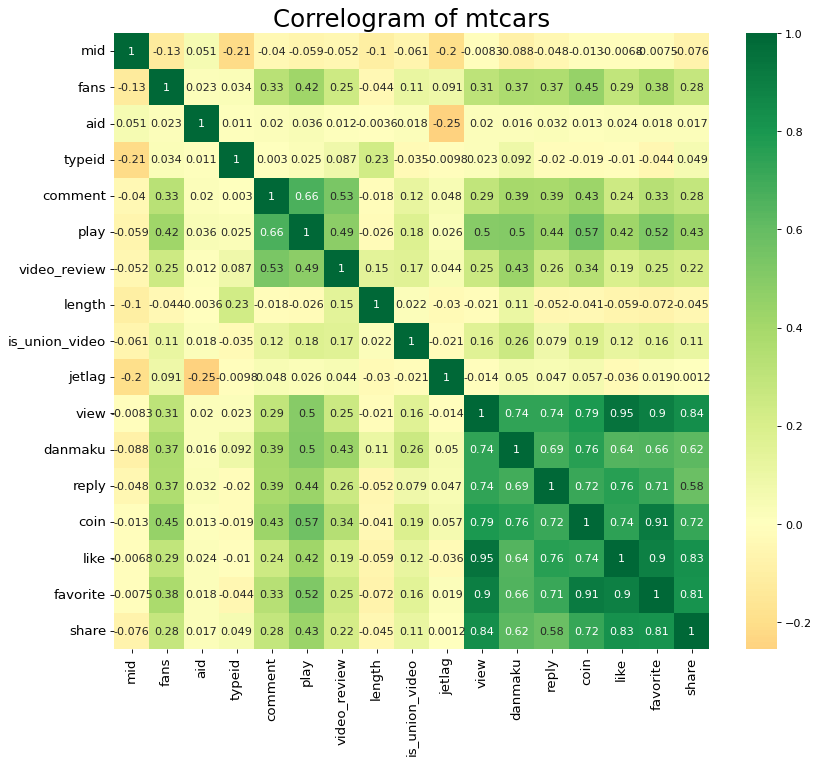

In [61]:
# Import Dataset
import seaborn as sns
import matplotlib.pyplot as plt
# Plot
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(video_data.corr(), xticklabels=video_data.corr().columns, yticklabels=video_data.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [87]:
corr_video_data=video_data[['length','jetlag','is_union_video','view','danmaku','reply','coin','like','favorite','share']]

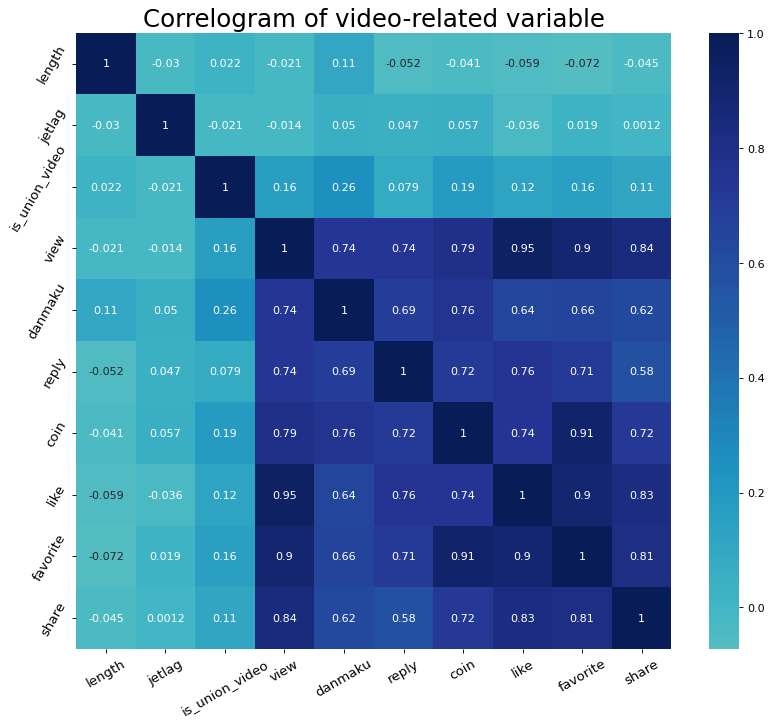

In [95]:
# Import Dataset
import seaborn as sns
import matplotlib.pyplot as plt
# Plot
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(corr_video_data.corr(), xticklabels=corr_video_data.corr().columns, yticklabels=corr_video_data.corr().columns, cmap='YlGnBu', center=0, annot=True)

# Decorations
plt.title('Correlogram of video-related variable', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xticks (rotation=30)
plt.yticks (rotation=60)
plt.show()

In [81]:
video_data=video_data.drop(['meta'], axis=1)

In [85]:
live_data_eighty=live_data[['mid','fans','attracitve']]
video_data1=pd.merge(live_data_eighty,video_data,on = ['mid'],how='left')
video_data1=video_data1.dropna()
video_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13751 entries, 0 to 13980
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             13751 non-null  int64  
 1   fans            13751 non-null  int64  
 2   attracitve      13751 non-null  float64
 3   aid             13751 non-null  float64
 4   created         13751 non-null  object 
 5   typeid          13751 non-null  float64
 6   comment         13751 non-null  float64
 7   play            13751 non-null  float64
 8   video_review    13751 non-null  float64
 9   length          13751 non-null  float64
 10  is_union_video  13751 non-null  float64
 11  view            13751 non-null  float64
 12  danmaku         13751 non-null  float64
 13  reply           13751 non-null  float64
 14  coin            13751 non-null  float64
 15  like            13751 non-null  float64
 16  favorite        13751 non-null  float64
 17  share           13751 non-null 

In [23]:
liver_data=pd.read_csv("liver_data.csv",encoding="UTF-8")
liver_data=liver_data[['mid','attracitve']]
videonum_data=pd.read_csv("videonum.csv",encoding="UTF-8")
#video_data=pd.merge(video_data,videonum_data,on = ['mid'],how='left')
video_data=pd.merge(video_data,liver_data,on = ['mid'],how='left')
video_data.head()

,mid,aid,created,typeid,comment,play,video_review,length,is_union_video,jetlag,fans,video_num,view,danmaku,reply,coin,like,favorite,share,attracitve
0,181559741,735469079,2023/1/16 1:13,174,11,139,806,281580,2,2,18436,327,505,2173,23,24,217,12,1,NaN
1,484660274,777713344,2023/1/12 22:43,17,13,160,14,96000,2,6,25458,102,888,20,21,108,395,54,27,48.319863
2,1736210,265576723,2023/1/18 23:09,27,12,238,16,35,2,0,9185,61,69964,1007,632,813,10425,2395,229,NaN
3,473708883,772336006,2022/8/22 17:26,27,14,251,12,69,2,149,12913,37,118036,670,832,863,22834,2645,83,NaN
4,21693393,6602054,2016/10/8 21:54,31,20,262,32,256,2,2293,11651,104,74900,597,2721,5499,9201,2707,449,NaN


In [86]:
tuiguang=[]
for index, row in video_data1.iterrows():
    tuiguangyinzi=min(int(row['coin'])/2,row['like'],row['favorite'])
    tuiguang.append(tuiguangyinzi)
video_data1['tgyinzi']=tuiguang

In [91]:
video_data1.to_csv('eighty_loop_data.csv',encoding='utf-8')

In [25]:
video_data['play_ln']=video_data['play'].map(lambda x: math.log2(x))
video_data.tail()

,mid,aid,created,typeid,comment,play,video_review,length,is_union_video,jetlag,...,view,danmaku,reply,coin,like,favorite,share,attracitve,tgyinzi,play_ln
23914,600985,808789968,2022/2/7 20:00,25,2700,8468895,1341,32,2,345,...,32363277,64723,15179,234585,2212469,542488,142227,NaN,117292.5,23.013742
23915,1950658,931125260,2021/6/14 18:40,31,10436,9391249,9378,197,2,583,...,15531353,17938,23703,612353,958092,534081,85247,90.096577,306176.5,23.162886
23916,11861569,464491026,2021/11/28 14:50,29,8285,11161557,10040,191,1,416,...,24742214,38689,28990,591885,2613710,685253,134882,NaN,295942.5,23.412035
23917,13199099,466989165,2022/3/4 18:49,138,4537,13442476,17456,64,2,320,...,46779587,34132,24361,311545,3597173,554663,444515,NaN,155772.5,23.680296
23918,471723540,968749002,2020/7/4 11:44,253,5335,13869459,72383,500,2,928,...,68518902,1045759,86935,1674851,4494296,935171,180535,NaN,837425.5,23.725408


外生 typeid
video_review 弹幕数

In [16]:
#danmaku
cols=['length', 'jetlag', 'fans', 'view']
danmaku_result = looper(0.05,cols,video_data1,'danmaku')  
danmaku_result.summary() 

NameError: name 'looper' is not defined

In [90]:
#danmaku
cols=['length', 'jetlag', 'fans', 'is_union_video']
danmaku_result = looper(0.05,cols,video_data1,'reply')  
danmaku_result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  reply   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     402.8
Date:                Wed, 08 Mar 2023   Prob (F-statistic):          7.97e-251
Time:                        22:19:59   Log-Likelihood:            -1.4897e+05
No. Observations:               13751   AIC:                         2.979e+05
Df Residuals:                   13747   BIC:                         2.980e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            234.8782    206.726      1.136      0.256    -170.334     640.090
length            -0.0029      0.001     -2.956      0.003      -0.005      -0.001
fans               0.0483      0.002     21.888      0.000       0.044       0.053
is_union_video  7173.1088    268.283     26.737      0.000    6647.237    7698.981
==============================================================================
Omnibus:                    26879.582   Durbin-Watson:                   0.759
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         69327192.819
Skew:                          15.582   Prob(JB):                         0.00
Kurtosis:                     349.450   Cond. No.                     3.07e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.07e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
#coin
cols=[ 'video_num',  'danmaku', 'like']
coin_result = looper(0.05,cols,video_data, 'coin')  
coin_result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   coin   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                 2.393e+04
Date:                Tue, 07 Mar 2023   Prob (F-statistic):               0.00
Time:                        22:18:27   Log-Likelihood:            -3.1902e+05
No. Observations:               23919   AIC:                         6.380e+05
Df Residuals:                   23916   BIC:                         6.381e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -661.4274   1074.745     -0.615      0.538   -2767.995    1445.140
danmaku        1.8407      0.022     83.264      0.000       1.797       1.884
like           0.1474      0.001    109.281      0.000       0.145       0.150
==============================================================================
Omnibus:                    23572.766   Durbin-Watson:                   1.680
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3152659.109
Skew:                           4.498   Prob(JB):                         0.00
Kurtosis:                      58.520   Cond. No.                     1.11e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
video_data['tgyinzi']=tuiguangyinzi

In [ ]:
winsorize(a, limits=[0.2,0.1])

In [35]:
cols=['jetlag', 'reply', 'coin', 'like','share','tgyinzi']
play_result = looper(0.05,cols,video_data, 'view')  
play_result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   view   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 5.489e+04
Date:                Wed, 08 Mar 2023   Prob (F-statistic):               0.00
Time:                        00:01:22   Log-Likelihood:            -3.9670e+05
No. Observations:               23919   AIC:                         7.934e+05
Df Residuals:                   23913   BIC:                         7.935e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.693e+05   3.77e+04     -4.494      0.000   -2.43e+05   -9.55e+04
jetlag       724.9605     70.766     10.245      0.000     586.256     863.666
reply          7.1812      1.620      4.434      0.000       4.006      10.356
coin           8.0011      0.161     49.782      0.000       7.686       8.316
like          11.3642      0.060    188.409      0.000      11.246      11.482
share         16.6030      0.657     25.272      0.000      15.315      17.891
==============================================================================
Omnibus:                     5693.233   Durbin-Watson:                   1.661
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           237649.809
Skew:                           0.364   Prob(JB):                         0.00
Kurtosis:                      18.425   Cond. No.                     1.55e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
cols=['danmaku', 'reply', 'favorite']
play_result = looper(0.05,cols,video_data, 'like')  
play_result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   like   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                 3.257e+04
Date:                Tue, 07 Mar 2023   Prob (F-statistic):               0.00
Time:                        09:16:15   Log-Likelihood:            -3.4265e+05
No. Observations:               23919   AIC:                         6.853e+05
Df Residuals:                   23915   BIC:                         6.853e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.483e+04   2928.295     15.308      0.000    3.91e+04    5.06e+04
danmaku        0.8899      0.063     14.061      0.000       0.766       1.014
reply          8.7359      0.160     54.621      0.000       8.422       9.049
favorite       2.7023      0.017    157.145      0.000       2.669       2.736
==============================================================================
Omnibus:                    10991.053   Durbin-Watson:                   1.554
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2625702.025
Skew:                           1.042   Prob(JB):                         0.00
Kurtosis:                      54.286   Cond. No.                     2.79e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.79e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [111]:
cols=['jetlag', 'reply','length', 'danmaku','is_union_video']
play_result = looper(0.05,cols,video_data, 'favorite')  
play_result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               favorite   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                 1.286e+04
Date:                Wed, 08 Mar 2023   Prob (F-statistic):               0.00
Time:                        22:34:40   Log-Likelihood:            -5.4316e+05
No. Observations:               41543   AIC:                         1.086e+06
Df Residuals:                   41538   BIC:                         1.086e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           4434.4721    851.101      5.210      0.000    2766.297    6102.647
jetlag           -10.4441      1.785     -5.850      0.000     -13.943      -6.945
reply              5.1398      0.038    135.571      0.000       5.066       5.214
danmaku            0.9452      0.018     53.543      0.000       0.911       0.980
is_union_video  2.627e+04   1536.800     17.093      0.000    2.33e+04    2.93e+04
==============================================================================
Omnibus:                    60710.096   Durbin-Watson:                   1.608
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         51689690.972
Skew:                           8.560   Prob(JB):                         0.00
Kurtosis:                     174.956   Cond. No.                     1.26e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
cols=['like','coin']
share_result = looper(0.05,cols,video_data, 'share')  
share_result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  share   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                 2.674e+04
Date:                Tue, 07 Mar 2023   Prob (F-statistic):               0.00
Time:                        09:15:31   Log-Likelihood:            -2.8640e+05
No. Observations:               23919   AIC:                         5.728e+05
Df Residuals:                   23916   BIC:                         5.728e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6528.3178    274.122    -23.815      0.000   -7065.614   -5991.022
like           0.0496      0.000    119.201      0.000       0.049       0.050
coin           0.0581      0.001     39.917      0.000       0.055       0.061
==============================================================================
Omnibus:                    23164.466   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5498561.738
Skew:                           4.149   Prob(JB):                         0.00
Kurtosis:                      76.813   Cond. No.                     1.14e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##  个人特质

In [10]:
#liver_data video_data 
liver_data1=pd.read_csv("liver_data.csv",encoding="UTF-8")
earn_data1=pd.read_csv("直播间营收数据.csv",encoding="UTF-8")
fan_data1=pd.read_csv("虚拟主播粉丝数据.csv",encoding="UTF-8")

In [11]:
liver_data1.head()

,Unnamed: 0,mid,sex,level,official,fans,liveCount,video_num,attracitve
0,0,484322035,2,6,1,1047366,31,380.0,90.985130
1,1,32906095,2,6,0,84111,7,59.0,16.900324
2,2,1480838,2,6,0,46510,15,26.0,11.517861
3,3,508963009,2,6,1,1118283,37,144.0,42.029023
4,4,1442771,2,6,1,86717,103,120.0,50.852931


In [9]:
def timecount(x):
    if x.count(':') ==2:
        h, m, s = x.strip().split(':') #.split()函数将其通过':'分隔开，.strip()函数用来除去空格
        time=int(h)*3600 + int(m)*60 + int(s) #int()函数转换成整数运算
    else:
        m, s = x.strip().split(':')
        time=int(m)*60 + int(s)
    return time

#转换视频发布时间
def jetlag(x):
    date_time = datetime.strptime(x , "%Y/%m/%d %H:%M")
    d2 = datetime(2023, 1, 19)
    lag=int((d2 - date_time).days)
    if lag<0: lag=1
    return lag

In [20]:
def looper(limit,cols,df,col):     #剔除p值不显著的
    for i in range(len(cols)):  
        data1 = df[cols]  
        x = sm.add_constant(data1) #生成自变量  
        y = df[col] #生成因变量  
        model = sm.OLS(y, x) #生成模型  
        result = model.fit() #模型拟合  
        pvalues = result.pvalues #得到结果中所有P值  
        pvalues.drop('const',inplace=True) #把const取得  
        pmax = max(pvalues) #选出最大的P值  
        if pmax>limit:  
            ind = pvalues.idxmax() #找出最大P值的index  
            cols.remove(ind) #把这个index从cols中删除  
        else:  
            return result  
#Prob (F-statistic)是我们常用的P值，其接近于零，说明我们的多元线性方程是显著的.
#通过图3中“P>|t|”这一列来判断，这一列中我们可以选定一个阈值，比如统计学常用的就是0.05、0.02或0.01，
#这里我们就用0.05，凡是P>|t|这列中数值大于0.05的自变量，我们都把它剔除掉，这些就是和y线性关系不显著的自变量，

In [10]:
video_data1=pd.read_csv("虚拟主播视频数据.csv",encoding="gbk")
video_data1['length']=video_data1['length'].map(lambda x: timecount(x))
video_data1.head()

,Unnamed: 0,mid,aid,created,typeid,comment,play,video_review,length,is_union_video,meta
0,2956,743603,690090635,2022/11/13 8:33,174,0,0,195,335340,0,NaN
1,2957,743603,775056142,2022/11/12 7:17,174,0,0,153,423060,0,NaN
2,1408,33060681,265198029,2023/1/12 22:00,172,0,0,0,356,0,NaN
3,1473,33060681,691616294,2022/12/22 20:45,172,0,0,0,254,0,NaN
4,1480,33060681,734063718,2022/12/22 14:09,17,0,0,0,107,0,NaN


In [11]:
import time
date2=[]
for index, row in video_data1.iterrows():
    time_array  = time.strptime(row['created'], "%Y/%m/%d %H:%M")
    str_date = time.strftime("%Y-%m-%d %H:%M", time_array)
    date1=re.findall(r'(.*) ', str_date)
    date2.append(date1[0])
video_data1['DATE']=date2

In [12]:
video_data2=video_data1[['mid','length','DATE']]
video_data2.head()

,mid,length,DATE
0,743603,335340,2022-11-13
1,743603,423060,2022-11-12
2,33060681,356,2023-01-12
3,33060681,254,2022-12-22
4,33060681,107,2022-12-22


In [15]:
liver_data1.head()

,Unnamed: 0,mid,sex,level,official,fans,liveCount,video_num,attracitve
0,0,484322035,2,6,1,1047366,31,380.0,90.985130
1,1,32906095,2,6,0,84111,7,59.0,16.900324
2,2,1480838,2,6,0,46510,15,26.0,11.517861
3,3,508963009,2,6,1,1118283,37,144.0,42.029023
4,4,1442771,2,6,1,86717,103,120.0,50.852931


In [10]:
earn_data1.head()

,Unnamed: 0,mid,date,count,currency
0,0,392101937,2023-01-19T00:00:00Z,0,0.0
1,1,178464220,2023-01-19T00:00:00Z,0,0.0
2,2,178464220,2022-12-03T00:00:00Z,1,1.0
3,3,178464220,2022-11-22T00:00:00Z,1,1.0
4,4,178464220,2022-11-20T00:00:00Z,1,0.5


In [16]:
fan_data1.head()

,Unnamed: 0,mid,fans,created_at,rate1,rate7
0,0,178464220,10204.0,2019-02-12T08:35:30.695Z,NaN,NaN
1,1,178464220,10292.0,2019-02-13T08:35:12.691Z,NaN,NaN
2,2,178464220,10384.0,2019-02-14T08:33:42.528Z,NaN,NaN
3,3,178464220,10470.0,2019-02-15T08:30:05.038Z,NaN,NaN
4,4,178464220,10582.0,2019-02-16T08:28:03.021Z,NaN,NaN


In [17]:
date1=[]
for index, row in earn_data1.iterrows():
    date=re.findall(r'(.*)T', row['date'])
    date1.append((date[0]))
earn_data1['DATE']=date1
earn_data1.head()

,Unnamed: 0,mid,date,count,currency,DATE
0,0,392101937,2023-01-19T00:00:00Z,0,0.0,2023-01-19
1,1,178464220,2023-01-19T00:00:00Z,0,0.0,2023-01-19
2,2,178464220,2022-12-03T00:00:00Z,1,1.0,2022-12-03
3,3,178464220,2022-11-22T00:00:00Z,1,1.0,2022-11-22
4,4,178464220,2022-11-20T00:00:00Z,1,0.5,2022-11-20


In [18]:
date1=[]
for index, row in fan_data1.iterrows():
    date=re.findall(r'(.*)T', row['created_at'])
    date1.append((date[0]))
fan_data1['DATE']=date1
fan_data1.head()

,Unnamed: 0,mid,fans,created_at,rate1,rate7,DATE
0,0,178464220,10204.0,2019-02-12T08:35:30.695Z,NaN,NaN,2019-02-12
1,1,178464220,10292.0,2019-02-13T08:35:12.691Z,NaN,NaN,2019-02-13
2,2,178464220,10384.0,2019-02-14T08:33:42.528Z,NaN,NaN,2019-02-14
3,3,178464220,10470.0,2019-02-15T08:30:05.038Z,NaN,NaN,2019-02-15
4,4,178464220,10582.0,2019-02-16T08:28:03.021Z,NaN,NaN,2019-02-16


In [19]:
fanrate_data=fan_data1[fan_data1['rate1'].notna()][['mid','fans','rate1','rate7','DATE']]
earn_data2=earn_data1[['mid','currency','DATE','count']]
fanrate_data1=pd.merge(fanrate_data,earn_data2,on = ['mid','DATE'],how='left')
fanrate_data1['currency']=fanrate_data1['currency'].fillna(0)

In [20]:
attractive_data=liver_data1[['mid','attracitve','guards']]
fanrate_data2=pd.merge(fanrate_data1,attractive_data,on = ['mid'],how='right')
#fanrate_data1['currency']=fanrate_data1['currency'].fillna(0)

In [21]:
fanrate_data3=pd.merge(fanrate_data2,video_data2,on = ['mid','DATE'],how='left')
fanrate_data3['length']=fanrate_data3['length'].fillna(0)
fanrate_data3.head()

,mid,fans,rate1,rate7,DATE,currency,count,attracitve,length
0,484322035,652930.0,164.0,1052.0,2021-10-07,0.0,NaN,90.98513,0.0
1,484322035,652938.0,7.0,1017.0,2021-10-08,0.0,NaN,90.98513,0.0
2,484322035,653588.0,641.0,1135.0,2021-10-09,0.0,NaN,90.98513,162780.0
3,484322035,653687.0,98.0,1121.0,2021-10-10,0.0,NaN,90.98513,0.0
4,484322035,653699.0,10.0,1089.0,2021-10-11,0.0,NaN,90.98513,0.0


In [22]:
video_if=[]
for index, row in fanrate_data3.iterrows():
    if row['length']==0.0: video_if.append(0)
    else: video_if.append(1)
fanrate_data3['video_if']=video_if
fanrate_data3.head()

,mid,fans,rate1,rate7,DATE,currency,count,attracitve,length,video_if
0,484322035,652930.0,164.0,1052.0,2021-10-07,0.0,NaN,90.98513,0.0,0
1,484322035,652938.0,7.0,1017.0,2021-10-08,0.0,NaN,90.98513,0.0,0
2,484322035,653588.0,641.0,1135.0,2021-10-09,0.0,NaN,90.98513,162780.0,1
3,484322035,653687.0,98.0,1121.0,2021-10-10,0.0,NaN,90.98513,0.0,0
4,484322035,653699.0,10.0,1089.0,2021-10-11,0.0,NaN,90.98513,0.0,0


In [23]:
live_if=[]
for index, row in fanrate_data3.iterrows():
    if row['currency']>=200: live_if.append(1)
    else: live_if.append(0)
fanrate_data3['live_if']=live_if
fanrate_data3.head()

,mid,fans,rate1,rate7,DATE,currency,count,attracitve,length,video_if,live_if
0,484322035,652930.0,164.0,1052.0,2021-10-07,0.0,NaN,90.98513,0.0,0,0
1,484322035,652938.0,7.0,1017.0,2021-10-08,0.0,NaN,90.98513,0.0,0,0
2,484322035,653588.0,641.0,1135.0,2021-10-09,0.0,NaN,90.98513,162780.0,1,0
3,484322035,653687.0,98.0,1121.0,2021-10-10,0.0,NaN,90.98513,0.0,0,0
4,484322035,653699.0,10.0,1089.0,2021-10-11,0.0,NaN,90.98513,0.0,0,0


In [26]:
fanrate_data3=fanrate_data3[fanrate_data3['fans']<=191822]
fanrate_data3=fanrate_data3.dropna(axis=0)

In [44]:
fanrate_data3=fanrate_data3.dropna(axis=0)
fanrate_data3['lnfan']=fanrate_data3['fans'].map(lambda x: math.log(x))
fanrate_data3.head()

,mid,fans,rate1,rate7,DATE,currency,count,attracitve,length,video_if,live_if,lnfan
133,484322035,923567.0,1166.0,9932.0,2022-09-02,1921.6,966.0,90.98513,0.0,0,1,13.735999
135,484322035,925569.0,1142.0,8392.0,2022-09-04,1199.9,605.0,90.98513,0.0,0,1,13.738164
138,484322035,930297.0,3131.0,9028.0,2022-09-07,2387.8,2247.0,90.98513,0.0,0,1,13.743259
140,484322035,931607.0,679.0,8146.0,2022-09-09,2046.3,1430.0,90.98513,0.0,0,1,13.744666
142,484322035,934541.0,1695.0,8978.0,2022-09-11,2028.6,770.0,90.98513,0.0,0,1,13.747811


In [27]:
fanrate_data3.head()

,mid,fans,rate1,rate7,DATE,currency,count,attracitve,length,video_if,live_if
321,32906095,66806.0,96.0,492.0,2022-09-03,140.8,11.0,16.900324,0.0,0,0
324,32906095,67660.0,215.0,703.0,2022-09-11,1.6,7.0,16.900324,0.0,0,0
330,32906095,68344.0,194.0,368.0,2022-09-25,344.6,280.0,16.900324,0.0,0,1
336,32906095,68682.0,46.0,531.0,2022-10-02,173.0,4.0,16.900324,0.0,0,0
365,32906095,72712.0,30.0,351.0,2022-11-04,53.2,89.0,16.900324,0.0,0,0


In [42]:
fanrate_data4.head()

,mid,fans,rate1,rate7,DATE,currency,count,attracitve,length,video_if,live_if,lnrate1
133,484322035,923567.0,1166.0,9932.0,2022-09-02,1921.6,966.0,90.98513,0.0,0,1,7.061334
135,484322035,925569.0,1142.0,8392.0,2022-09-04,1199.9,605.0,90.98513,0.0,0,1,7.040536
138,484322035,930297.0,3131.0,9028.0,2022-09-07,2387.8,2247.0,90.98513,0.0,0,1,8.049108
140,484322035,931607.0,679.0,8146.0,2022-09-09,2046.3,1430.0,90.98513,0.0,0,1,6.520621
142,484322035,934541.0,1695.0,8978.0,2022-09-11,2028.6,770.0,90.98513,0.0,0,1,7.435438


In [45]:
cols=['fans','attracitve', 'video_if','live_if','length']
play_result = looper(0.05,cols,fanrate_data3, 'count')  
play_result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     147.1
Date:                Thu, 09 Mar 2023   Prob (F-statistic):           8.39e-34
Time:                        21:49:37   Log-Likelihood:            -5.9818e+05
No. Observations:               58901   AIC:                         1.196e+06
Df Residuals:                   58899   BIC:                         1.196e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.9459     45.388      1.034      0.301     -42.014     135.906
live_if      667.2515     55.025     12.126      0.000     559.403     775.100
==============================================================================
Omnibus:                   206230.177   Durbin-Watson:                   0.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      63150650024.227
Skew:                          68.443   Prob(JB):                         0.00
Kurtosis:                    5073.783   Cond. No.                         3.30
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
cols=['attracitve', 'video_if','live_if','length','count']
play_result = looper(0.05,cols,fanrate_data3, 'currency')  
play_result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               currency   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                 1.171e+04
Date:                Thu, 09 Mar 2023   Prob (F-statistic):               0.00
Time:                        22:14:36   Log-Likelihood:            -6.2701e+05
No. Observations:               58901   AIC:                         1.254e+06
Df Residuals:                   58896   BIC:                         1.254e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         90.9539     86.992      1.046      0.296     -79.550     261.458
attracitve    -3.5408      1.103     -3.211      0.001      -5.702      -1.379
video_if     463.9493    112.829      4.112      0.000     242.804     685.095
live_if     1712.9568     89.974     19.038      0.000    1536.607    1889.306
count          1.4406      0.007    214.273      0.000       1.427       1.454
==============================================================================
Omnibus:                   167437.969   Durbin-Watson:                   1.653
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      13316099634.303
Skew:                          37.865   Prob(JB):                         0.00
Kurtosis:                    2331.108   Cond. No.                     1.73e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.73e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
cols=['fans','attracitve', 'video_if','live_if','count']
play_result = looper(0.05,cols,fanrate_data3, 'rate1')  
play_result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  rate1   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     571.6
Date:                Thu, 09 Mar 2023   Prob (F-statistic):               0.00
Time:                        21:33:56   Log-Likelihood:            -4.4978e+05
No. Observations:               58901   AIC:                         8.996e+05
Df Residuals:                   58895   BIC:                         8.996e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -20.9018      4.886     -4.278      0.000     -30.478     -11.326
fans           0.0016   4.78e-05     33.770      0.000       0.002       0.002
attracitve    -0.6101      0.056    -10.870      0.000      -0.720      -0.500
video_if     185.5125      5.568     33.318      0.000     174.599     196.426
live_if       79.4567      4.444     17.879      0.000      70.746      88.167
count          0.0031      0.000      9.486      0.000       0.002       0.004
==============================================================================
Omnibus:                   117911.426   Durbin-Watson:                   0.598
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        630118528.299
Skew:                          16.182   Prob(JB):                         0.00
Kurtosis:                     508.671   Cond. No.                     2.24e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.24e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
fan_r_data=pd.merge(fan_data,videonum_data,on = ['mid'],how='left')

NameError: name 'fan_data' is not defined

In [ ]:
12

In [ ]:
def type_classifier(id):
    if id in [1,24,25,47,86,27]: return 10 #动画
    elif id in [13,33,32,51,152]: return 20 #番剧
    elif id in [3,28,31,30,194,59,193,29,130]: return 30 #yinyue
    elif id in [4,17,171,172,65,173,121,136,19]:return 40 #youxi
    elif id in [160,138,21,76,75,161,162,163,176,174]: return 50 #shenghuo
    elif id in []
    else: print(id)

SyntaxError: invalid syntax (399841125.py, line 7)

In [ ]:
for i in video_data['typeid']:
    t=type_classifier(i)


212
215
253
253
95
250
95
208
208
201
250
250
215
122
122
122
122
122
122
122
122
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
183
253
20
253
253
208
253
26
26
20
212
210
199
20
199
199
20
20
20
253
253
253
242
22
253
253
250
218
206
205
201
206
206
206
206
206
206
206
205
205
205
205
205
205
201
205
205
205
206
206
205
205
205
205
205
205
205
201
218
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
122
253
228
253
228
228
253
253
222
253
242
242
242
242
242
242
242
242
242
242
201
201
201
201
201
201
201
201
208
168
253
253
253
253
253
253
253
253
253
253
168
95
253
253
253
253
168
253
168
253
253
253
253
253
253
253
253
95
253
253
253
253
253
253
253
253
168
253
253
253
253
253
253
253
253
253
253
253
168
253
253
95
253
253
253
253
253
253
253
168
253
220
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
168
253
253
168
168
168
182
168
253
253
253
253
253
201
215
154
20
241